count    32.000000
mean     72.130499
std       1.659449
min      68.763727
25%      70.951193
50%      72.020221
75%      73.317626
max      75.527729
Name: temp_JA, dtype: float64


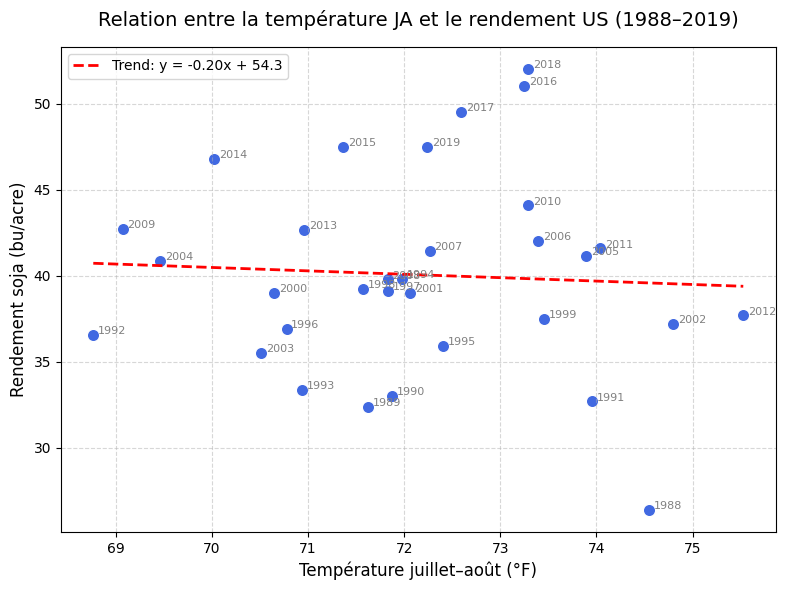

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Charger ton CSV
df = pd.read_csv("data/processed/waob_features_national.csv")

# Garder les années utiles
df = df[(df["year"] >= 1988) & (df["year"] <= 2019)]
print(df["temp_JA"].describe())

# Création du scatter
plt.figure(figsize=(8,6))
plt.scatter(df["temp_JA"], df["yield_bu_acre"], color="royalblue", edgecolor="white", s=80)

# Ajout des labels d'année
for _, row in df.iterrows():
    plt.text(row["temp_JA"] + 0.05, row["yield_bu_acre"] + 0.05, str(int(row["year"])), fontsize=8, color="gray")

# Ajustement de la droite de régression linéaire
coef = np.polyfit(df["temp_JA"], df["yield_bu_acre"], 1)
x_vals = np.linspace(df["temp_JA"].min(), df["temp_JA"].max(), 100)
y_vals = np.polyval(coef, x_vals)
plt.plot(x_vals, y_vals, color="red", linestyle="--", linewidth=2, label=f"Trend: y = {coef[0]:.2f}x + {coef[1]:.1f}")

# Mise en forme
plt.xlabel("Température juillet–août (°F)", fontsize=12)
plt.ylabel("Rendement soja (bu/acre)", fontsize=12)
plt.title("Relation entre la température JA et le rendement US (1988–2019)", fontsize=14, pad=15)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
